In [1]:
# Student name: 
# Student ID: 

Please fill this notebook with your code (if necessary, remove `pass` after "# your code here"), execute all cells, save the notebook on your machine. Upload the notebook (the file whose filename extension is `.ipynb`) only. Please upload to the [Math9 HW05 Dropbox](https://eee.uci.edu/toolbox/dropbox/) by the deadline indicated in the Dropbox. A primer on Dropbox is [here](https://eee.uci.edu/help/dropbox/instructors/_assets/dropbox_primer.pdf).

# Problem 1: A Class for Polynomials

Design a class called `Polynomial` for polynomials in one variable. You should use a `list` to store the coefficients of the polynomial. I should be able to do the following with your class:
* Initialize a polynomial using a list of its coefficients: e.g. `p = Polynomial([1.0, 2.0, 3.0])`
* Print a polynomial: e.g. `print(p)` for the `p` above should give: `1.0xˆ0 + 2.0xˆ1 + 3.0xˆ2`. You should implement `__repr__(self)` in your class for this, which should return a string. Optional: make sure you print negative coefficients correctly.
* Add polynomials to get a new polynomial. [Hint: implement `__add__(self, other)` in your class for this, it should return a new polynomial.]
* Evaluate the polynomial at a value `x` by running `p.eval(x)`, e.g., for the above polynomial, `p.eval(2.0)` should return `17.0`.

### Solution

In [2]:
class Polynomial():
    def __init__(self, xs):
        self.coeffs = xs
    
    def __repr__(self):
        if self.coeffs == []:
            return "0"
        c = ""
        for i, x in enumerate(self.coeffs):
            c += str(x) + "x" + "^" + str(i) + " + "
        return c[:-3]
    
    def __add__(self, other):
        i = 0
        new_coeffs = [0.0 for i in range(max(len(self.coeffs), len(other.coeffs)))]
        for i in range(len(new_coeffs)):
            coefa = self.coeffs[i] if i < len(self.coeffs) else 0.0
            coefb = other.coeffs[i] if i < len(other.coeffs) else 0.0
            new_coeffs[i] = coefa + coefb
        return Polynomial(new_coeffs)
                
    def eval(self, x):
        total = 0.0
        power_of_x = 1
        for i, coe in enumerate(self.coeffs):
            total += coe * power_of_x
            power_of_x *= x
        return total

p = Polynomial([1.0, 2.0, 3.0])
print 'p =', p
q = Polynomial([2.0, 3.0, 4.0])
print 'q =', q
print 'p + q =', p + q 
x = 2.0
print 'x =', x, '; p(x) =', p.eval(x)

p = 1.0x^0 + 2.0x^1 + 3.0x^2
q = 2.0x^0 + 3.0x^1 + 4.0x^2
p + q = 3.0x^0 + 5.0x^1 + 7.0x^2
x = 2.0 ; p(x) = 17.0


# Complex Numbers in Python

Complex numbers are numbers of the form $a + bi$ where $a,b \in \mathbb{R}$.
The number $i = \sqrt{-11}$ is the formal square root of $-1$, which we pretend exists. So we have $i^2 = -1$, and $i^3 = -i$ and $i^4 = 1$. The rules for addition and multiplication of complex numbers follow the usual algebraic rules. For example:

$$(2 + 3i) + (1 + 5i) = 3 + 8i$$

$$(2 + 3i)(1 + 5i) = 2 + 10i + 3i + 15i^2 = 2 + 13i - 15 = -13 + 13i $$

We can represent the complex number
$z = x + yi$ in the plane as follows:  

![](HW05_complex_numbers.png)

Here, $\bar{z} = x - yi$ is the complex conjugate of $z$. We have

$$ z\bar{z} = (x+yi)(x-yi) = x^2 -xyi + yxi -y^2i^2 = x^2 + y^2$$

So the norm (i.e. distance to the origin) of a complex number $z$ is $|z| = \sqrt{x^2+y^2} = \sqrt{z\bar{z}}$. 

The angle $\varphi$ between $z$ and the $x$ axis is called the phase of $z$. If $z$ has phase $\varphi$, then $z = |z|(\cos(\varphi) + i \sin(\varphi))$.

We have the formula
$$e^{i\theta} = \cos{\theta} + i \sin{\theta}$$

So, for every complex number $z$, we have:

$$z = |z|e^{i\text{ phase(z)}}$$

This leads to the famous formula:

$$e^{i\pi} = -1$$

Remark:

$$z_1z_2 = |z_1|e^{i\text{ phase($z_1$)}}|z_2|e^{i\text{ phase($z_2$)}} = |z_1||z_2| e^{i \text{ (phase}(z_1) + \text{ phase}(z_2))}$$

So when you multiply two complex numbers, you multiply the norms, and you add up the angles. 

In Python, complex numbers are represented by expressions like `2+3j`. Here, it is important that there is no space between the `3` and the `j`. 

If we set `z = 3 + 4j` then we can use `z.real` and `z.imag` to access the real and imaginary parts of `z`, namely `3` and `4`, respectively:

In [3]:
z = 3 + 4j
print 'z =', z
print 'type of z =', type(z)
print 'Re(z) =', z.real
print 'Im(z) =', z.imag

z = (3+4j)
type of z = <type 'complex'>
Re(z) = 3.0
Im(z) = 4.0


### Problem 2

Understand the code below, and fill in the blanks to produce the picture shown:


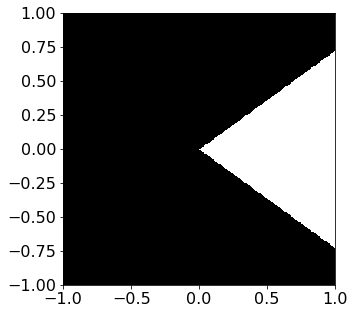

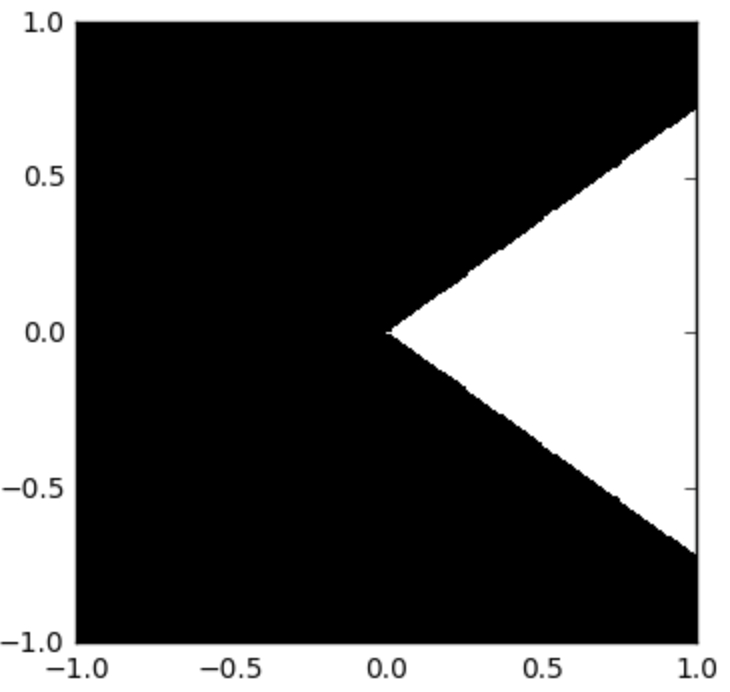

In [4]:
import HW05_library as lib
from cmath import phase
import math
from math import pi

# draws a picture for a function f: Complex -> Reals
def drawComplexFunction(f, imsize=300):
    g = lambda x,y: f(x+y*1j)
    lib.drawfunction(g, imsize=imsize)
    
def norm(z):
    # returns the norm of a complex number z as a float, e.g. `norm(3+4j)` should return `5.0`
    return math.sqrt(z.real * z.real + z.imag * z.imag)

def f_one(z):
    if -pi/5.0 < phase(z) < pi/5.0:
        return 1.0
    return 0.0

drawComplexFunction(f_one)

from IPython.display import Image, display
display(Image("HW05_f_one.png", width=400))

Observe that 
$$\text{phase} (z^k) = k\text{ phase}(z)$$

because if $z = re^{i\theta}$ then $z^k  = 
r^k z^{i k\theta}$. 
This means that the 7th power repeats the angular picture above 7 times.
Use this insight to complete `f_two` below: 


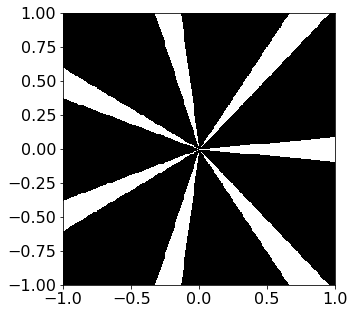

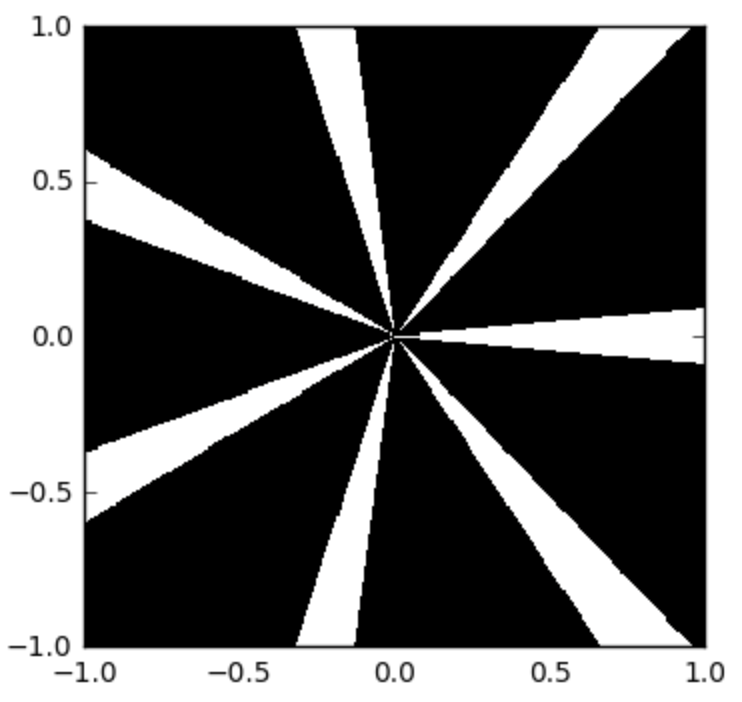

In [5]:
def f_two(z):
    if -pi/5 < phase(z**7) < pi/5:
        return 1.0
    return 0.0

drawComplexFunction(f_two)

from IPython.display import Image, display
display(Image("HW05_f_two.png", width=400))

To produce the next picture, think about moving the phase as you go away from the origin...

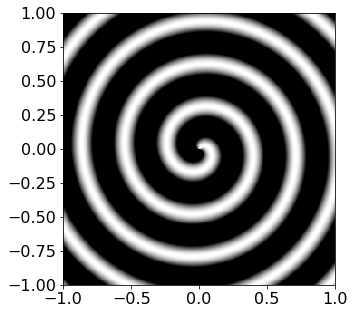

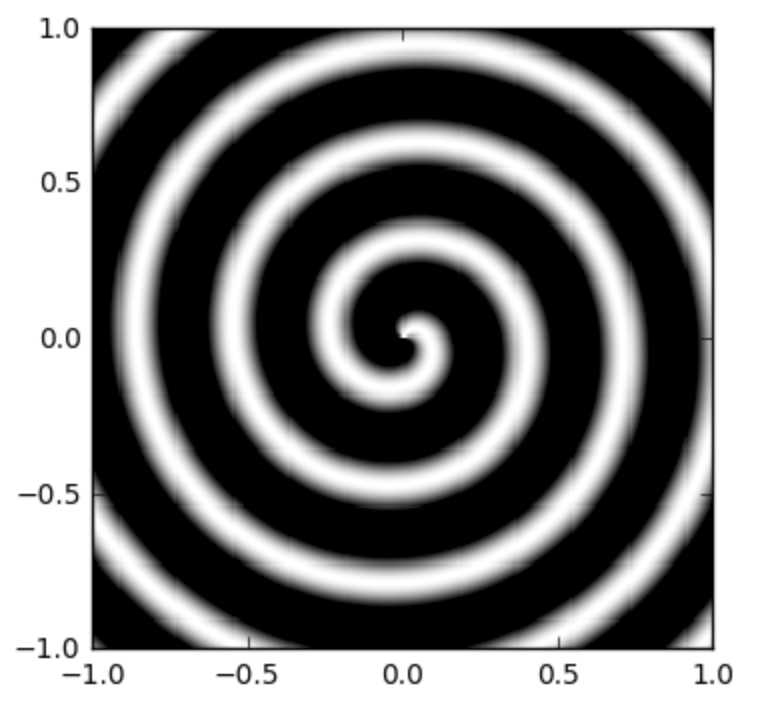

In [6]:
def f_three(z):
    return math.sin(phase(20*z) + norm(20*z))

drawComplexFunction(f_three)

from IPython.display import Image, display
display(Image("HW05_f_three.png", width=400))

# The Julia Set in the Complex Plane

The Julia set $J_c$ is defined as follows. Let $f(z) = z^2 + c$. Apply $f$ repeatedly to a complex number $z$, i.e. take $f(z)$, $f(f(z))$. $f(f(f(z)))$, $\dots$ This is an example of a *dynamical system*. 

As you do this, a typical point will lead to expenential growth as you keep squaring and adding $c$, i.e. the norm grows exponentially. The Julia set $J_c$ is the set of points which don't grow exponentially when you do this.  

To compute the Julia set, we will do the following: we will start with $z$ and compute  $f(z)$, $f(f(z))$. $f(f(f(z)))$, $\dots$ $f^k(z)$ for a fixed $k$, e.g. $k = 100$. If the result has norm $|f^k(z)| < 2$, we will assume $z$ is in the Julia set. 

To visualize the Julia set, we will do the following:  $|f^k(z)| < 2$ after $k$ iterations, the pixel will have white value (i.e. your function should output 1), but if $|f^i(z)| > 2$ at the $i$th iteration and not before, then the value will be $i/k$, so that it appears more white the closer it is to the actual Julia set.

### Problem 3

Complete the code below to draw the Julia set for $c = 0.28 + 0.008i$.


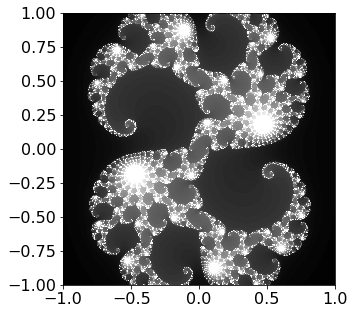

In [7]:
def julia(c, z, k=100):
    for i in range(k):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) > 4:
            return i/float(k)
    return 1.0

def my_julia(z):
    return julia(0.28 + 0.008j, z)

drawComplexFunction(my_julia, imsize=600)

# The Mandelbrot Fractal

Which $c$'s give interesting Julia sets $J_c$? One way to analyze that is the following question: for which $c$'s will the sequence $f(0), f(f(0)), \dots, f^k(0),\dots$ not grow exponentially? If we draw the answer to this, we get the Mandelbrot fractal, i.e. the Mandelbrot fractal is the set of points in the complex plane for which  $f(0), f(f(0)), \dots, f^k(0),\dots$ does not grow exponentially.

### Problem 4 

Complete the code below to draw the Mandelbrot fractal. 




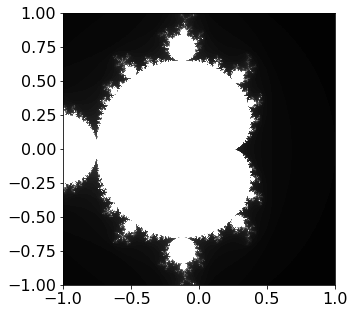

In [8]:
def mandel(c, k=100):
    z = 0.0 + 0.0j
    for i in range(k):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) > 4:
            return i/float(k)
    return 1.0

drawComplexFunction(mandel, imsize=600)

Optional: For values $c$ closer to the edge of the Mandelbrot set, you get the most interesting Julia sets $J_c$. Using this, you can explore more interesting values of $c$ for the previous question. 

